Name: Namrata Bhorade

Class: BE COMPS

Batch: A

UID: 2018130004

Roll No.: 03

# CEEL 82B, Data Science, 2022
# Lab 1: Study of Linear Regression


**Objective**: To carry out linear regression (including multiple regression) and build a regression model using Python Platform

This notebook performs linear regression analysis on Auto-MPG dataset and logistic regression on Horse Colic dataset and Credit score prediction dataset. Each section consists of data preprocessing such as handling null values, etc., exploratory data analysis,model training and evaluation through various metrics.

In [ ]:
# Importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RepeatedStratifiedKFold

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, roc_curve, roc_auc_score, auc, r2_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LogisticRegression, LinearRegression

from itertools import cycle

import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from scipy.stats import norm, skew #for some statistics

# Part-A: Linear Regression

1)	Predict a car's fuel economy from its physical parameters such as weight and engine size and power

## 1. Load the dataset (Use pandas )



 

 


In [ ]:
auto_data = pd.read_csv("/content/drive/MyDrive/DS-Lab/Lab/Exp1/auto-mpg.csv")

In [ ]:
auto_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


The info given above gives the insights about automobile's data read using csv. It contains 398 samples and 9 features.

In [ ]:
auto_data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


The above output gives the statistical description of the numerical features in the dataset.

## 2. Data Preprocessing (Handling NA values)

In [ ]:
# count of null values in each column
print(auto_data.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


### Dividing columns into categorical and numerical columns

In [ ]:
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_columns_auto = []
categorical_columns_auto = []
features = auto_data.columns.values.tolist()
for col in features:
    if auto_data[col].dtype in numerics:
        numerical_columns_auto.append(col)
    else:
        categorical_columns_auto.append(col)
print("Numerical Columns: ", numerical_columns_auto)

print("\nCategorical Columns: ", categorical_columns_auto)

Numerical Columns:  ['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'model year', 'origin']

Categorical Columns:  ['horsepower', 'car name']


In [ ]:
auto_data.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [ ]:
auto_data.loc[auto_data['horsepower']=='?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


From above output we can see that '?' represents null values in this dataset. Hence reading data again by specifying '?' as null value.

In [ ]:
auto_data = pd.read_csv("/content/drive/MyDrive/DS-Lab/Lab/Exp1/auto-mpg.csv", na_values=['?'])

In [ ]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [ ]:
# count of null values in each column
print(auto_data.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


Now we can see that there are 6 null values in horsepower column. First we need to convert the horsepower column from object to numeric

In [ ]:
auto_data['horsepower'] = auto_data['horsepower'].astype(str).astype(float)

In [ ]:
auto_data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


### Replacing null values in horsepower column with median

In [ ]:
auto_data.median()

mpg               23.0
cylinders          4.0
displacement     148.5
horsepower        93.5
weight          2803.5
acceleration      15.5
model year        76.0
origin             1.0
dtype: float64

In [ ]:
auto_data['horsepower']=auto_data['horsepower'].fillna(auto_data['horsepower'].median())

In [ ]:
# count of null values in each column
print(auto_data.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


Now all there is no null value present in the dataset.

### Removing car name column

In [ ]:
auto_data = auto_data.drop('car name', axis=1)

In [ ]:
auto_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,24.6,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1


### Replacing the categorical values of origin variable with original values.

In [ ]:
auto_data['origin'] = auto_data['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
auto_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,america
1,15.0,8,350.0,165.0,3693,11.5,70,america
2,18.0,8,318.0,150.0,3436,11.0,70,america
3,16.0,8,304.0,150.0,3433,12.0,70,america
4,17.0,8,302.0,140.0,3449,10.5,70,america
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,america
394,44.0,4,97.0,52.0,2130,24.6,82,europe
395,32.0,4,135.0,84.0,2295,11.6,82,america
396,28.0,4,120.0,79.0,2625,18.6,82,america


### Creating Dummy Variables

In [ ]:
auto_data = pd.get_dummies(auto_data, columns=['origin'])
auto_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130,24.6,82,0,0,1
395,32.0,4,135.0,84.0,2295,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625,18.6,82,1,0,0


In [ ]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             398 non-null    float64
 1   cylinders       398 non-null    int64  
 2   displacement    398 non-null    float64
 3   horsepower      398 non-null    float64
 4   weight          398 non-null    int64  
 5   acceleration    398 non-null    float64
 6   model year      398 non-null    int64  
 7   origin_america  398 non-null    uint8  
 8   origin_asia     398 non-null    uint8  
 9   origin_europe   398 non-null    uint8  
dtypes: float64(4), int64(3), uint8(3)
memory usage: 23.1 KB


In [ ]:
auto_data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


## 3. Exploratory Data Analysis (understanding the relationships between the variables with help of plot, scatter-plot, enery-plot etc) Use matplotlib 

### Outlier Detection

### Correlation Matrix

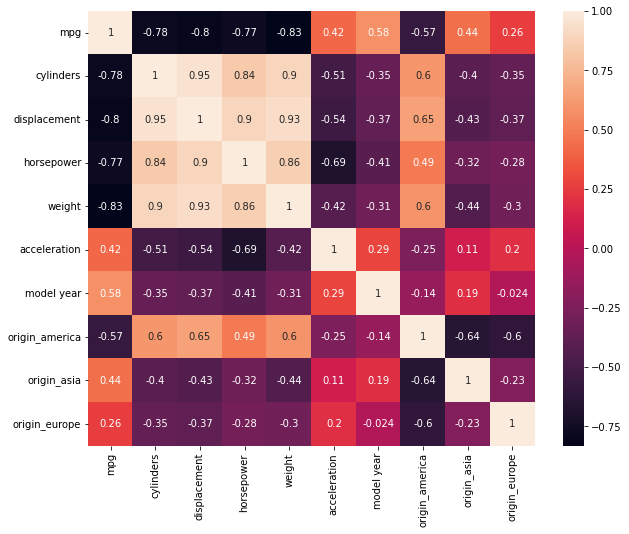

In [ ]:
correlation_data = auto_data.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(correlation_data, annot=True)
plt.show()

Arranging columns according to their correlation with mpg variable in descending order

In [ ]:
correlation_values = correlation_data['mpg'].sort_values(ascending=False)
correlation_values = abs(correlation_values).sort_values(ascending=False)
print("Correlation of Features wrt MPG")
print(abs(correlation_values).sort_values(ascending=False))

Correlation of Features wrt MPG
mpg               1.000000
weight            0.831741
displacement      0.804203
cylinders         0.775396
horsepower        0.773453
model year        0.579267
origin_america    0.568192
origin_asia       0.442174
acceleration      0.420289
origin_europe     0.259022
Name: mpg, dtype: float64


We can see that weight column has the highest correlation with the mpg column ie.e 0.831741

In [ ]:
data_columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']

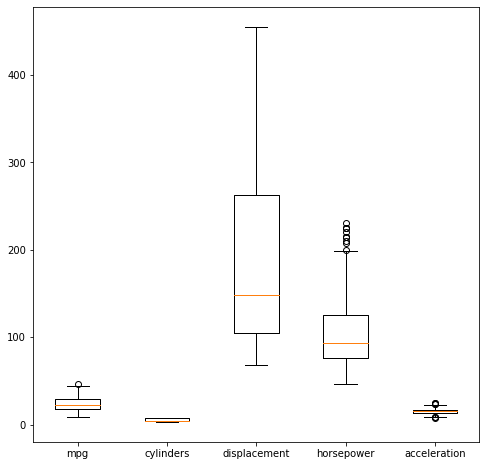

In [ ]:
plt.figure(figsize=(8,8))
plt.boxplot([vals.dropna() for col, vals in auto_data[['mpg', 'cylinders', 'displacement', 'horsepower', 'acceleration']].iteritems()])
plt.xticks([1,2,3,4,5], ['mpg', 'cylinders', 'displacement', 'horsepower', 'acceleration'])
plt.show()

In the above plot we can see that mpg, horsepower and acceleration features contain outliers that are represented using circles.

The function defined below handles outliers by substituting them with upper and lower whiskers.

In [ ]:
def treat_outliers():
    for col in data_columns:
        Q1 = auto_data[col].quantile(0.25)
        Q3 = auto_data[col].quantile(0.75)
        IQR = Q3 - Q1
        Lower_Whisker = Q1 - 1.5*IQR
        Upper_Whisker = Q3 +1.5*IQR
        auto_data.loc[(auto_data[col] > Upper_Whisker), col] = Upper_Whisker
        auto_data.loc[(auto_data[col] < Lower_Whisker), col] = Lower_Whisker

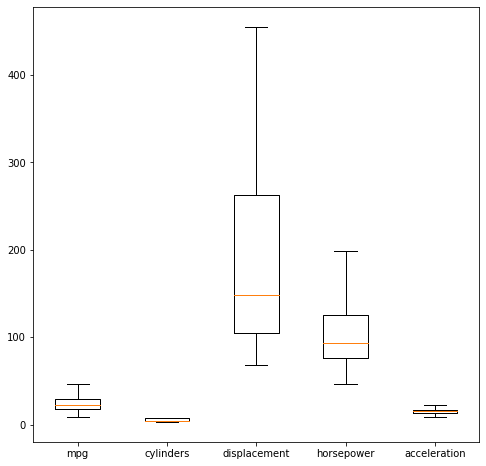

In [ ]:
treat_outliers()
plt.figure(figsize=(8,8))
plt.boxplot([vals.dropna() for col, vals in auto_data[['mpg', 'cylinders', 'displacement', 'horsepower', 'acceleration']].iteritems()])
plt.xticks([1,2,3,4,5], ['mpg', 'cylinders', 'displacement', 'horsepower', 'acceleration'])
plt.show()

### Correlation Matrix after Treating Outliers

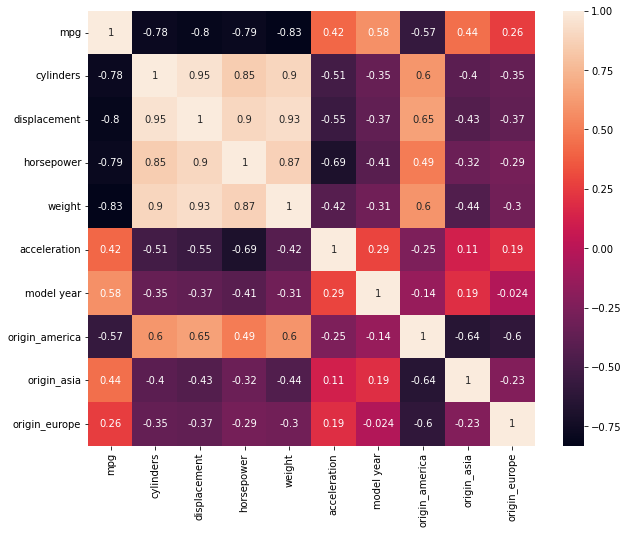

In [ ]:
correlation_data = auto_data.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(correlation_data, annot=True)
plt.show()

Arranging columns according to their correlation with mpg variable in descending order

In [ ]:
correlation_values = correlation_data['mpg'].sort_values(ascending=False)
correlation_values = abs(correlation_values).sort_values(ascending=False)
print("Correlation of Features wrt MPG")
print(abs(correlation_values).sort_values(ascending=False))

Correlation of Features wrt MPG
mpg               1.000000
weight            0.831901
displacement      0.804353
horsepower        0.785846
cylinders         0.775556
model year        0.579337
origin_america    0.568234
origin_asia       0.442094
acceleration      0.418333
origin_europe     0.259160
Name: mpg, dtype: float64


After treating outliers, the correlation of the features in dataset with the target feature i.e. mpg increases. For example, correlation of weight with mpg increased from 0.831741 to  0.831901.

### Target Variable


 Mean = 23.51 and Standard Deviation = 7.80



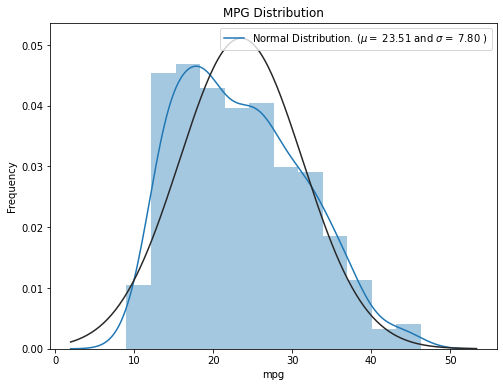

In [ ]:
plt.subplots(figsize=(8,6))
sns.distplot(auto_data['mpg'] , fit=norm);

# Get the fitted parameters used by the function
(mean, std) = norm.fit(auto_data['mpg'])
print( '\n Mean = {:.2f} and Standard Deviation = {:.2f}\n'.format(mean, std))

# Now plotting the distribution
plt.legend(['Normal Distribution. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mean, std)],
            loc='best')
plt.ylabel('Frequency')
plt.title('MPG Distribution')
plt.show()

From the above graph, we can see that the MPG variable is slighly right skewed

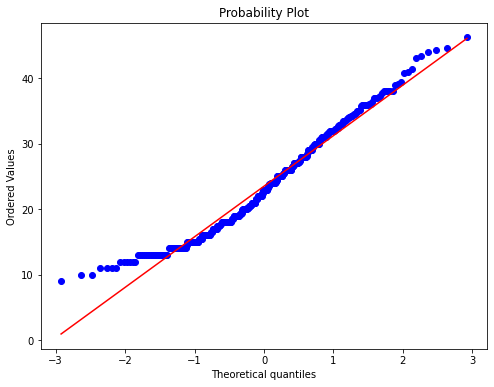

In [ ]:
fig = plt.figure(figsize=(8,6))
res = stats.probplot(auto_data['mpg'], plot=plt)
plt.show()

The probability plot justifies the skewness of data

### Histograms for all features

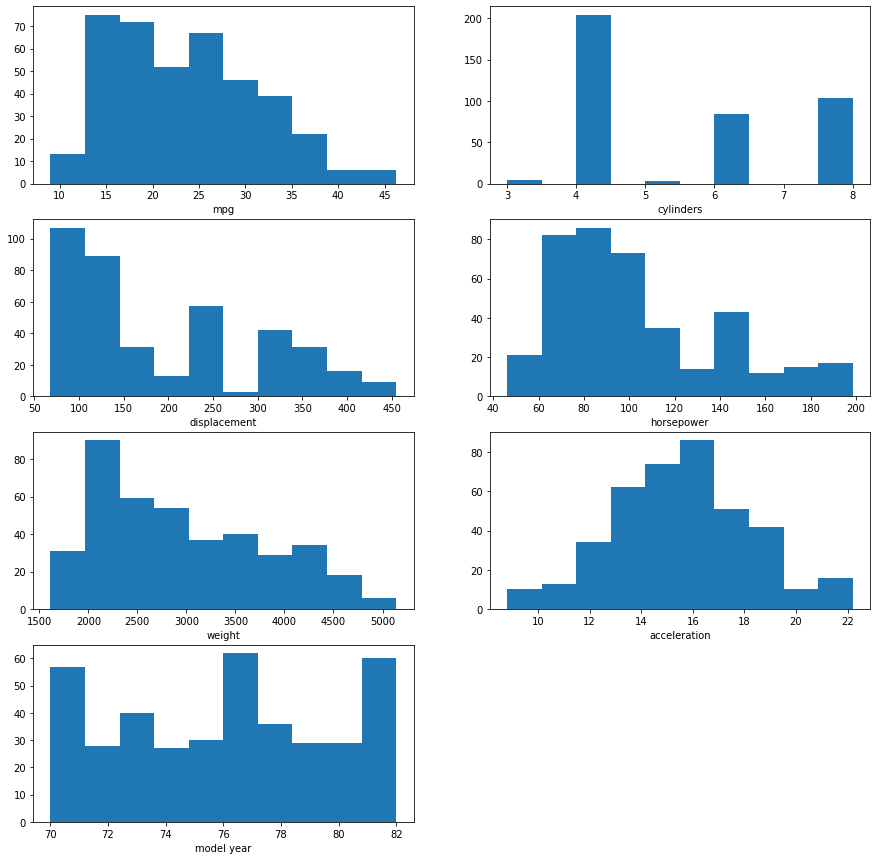

In [ ]:
df_plot = auto_data.iloc[:, 0:7]

plt.figure(figsize=(15,15))
col = df_plot.columns
for i in range(0,len(col)):
    plt.subplot(len(col)//2+1,2,i+1)
    plt.hist(auto_data[col[i]]);
    plt.xlabel(col[i])

The above plot shows the distribution of the features in the dataset using histogram plots. We can see that mpg, displacement, horsepower and weight are right skewed.

The distribution of the acceleration variable is somewhere close to the normal distribution. 

### Scatterplot Matrix

<Figure size 720x720 with 0 Axes>

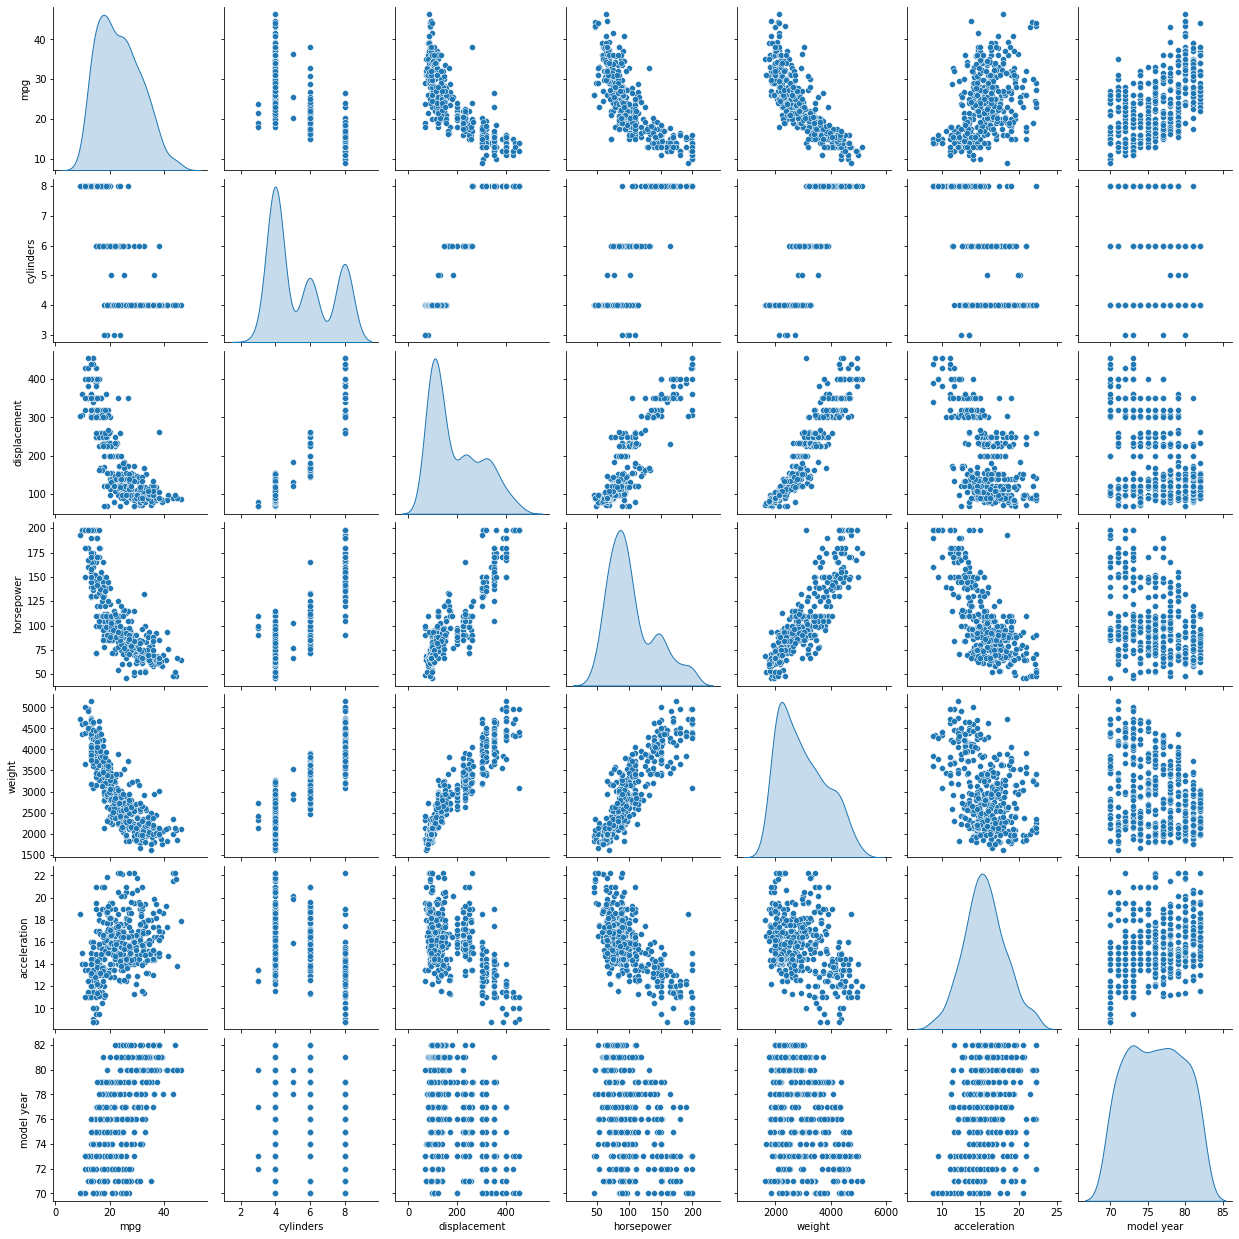

In [ ]:
plt.figure(figsize=(10,10))
sns.pairplot(df_plot, diag_kind='kde')
plt.show()

1. The above scatterplot shows that variables such as displacement, horsepower and weight have linear relationship with mpg with negative slope
2. The variables accleration and model_year have positive linear relationship with mpg.

## 4. Data Partition (80% for training and 20% for testing) (Use scikit-learn)


In [ ]:
# Independent attributes
X = auto_data.drop(columns='mpg')

# Dependent attributes
Y = auto_data[['mpg']]

# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=27)

# Scaling using standard scalar
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

## 5. Build the model (use scikit learn)

In [ ]:
# Create linear regression object
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

LinearRegression()

## 6. Summarize the model.

In [ ]:
linear_regression_model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

## 7. Prediction

In [ ]:
y_train_pred = linear_regression_model.predict(X_train)

In [ ]:
y_test_pred = linear_regression_model.predict(X_test)

In [ ]:
for idx, col_name in enumerate(auto_data.drop(columns='mpg').columns):
    print(f"Coefficient for {col_name}: {linear_regression_model.coef_[0][idx]}")

Coefficient for cylinders: -0.20958560736061016
Coefficient for displacement: 1.7368056765291273
Coefficient for horsepower: -1.074808984222586
Coefficient for weight: -5.281340724507239
Coefficient for acceleration: -0.013162454348547736
Coefficient for model year: 2.749851741298505
Coefficient for origin_america: -0.732399014273541
Coefficient for origin_asia: 0.4256803947460759
Coefficient for origin_europe: 0.48888491880523643


## 8. Evaluate the model

In [ ]:
linear_regression_score = linear_regression_model.score(X_test, y_test)
print("Score of Linear Regression Model: ", round(linear_regression_score, 5))

Score of Linear Regression Model:  0.88382


In [ ]:
print("Mean squared error: ", round(mean_squared_error(y_test, y_test_pred), 5))

Mean squared error:  8.31109


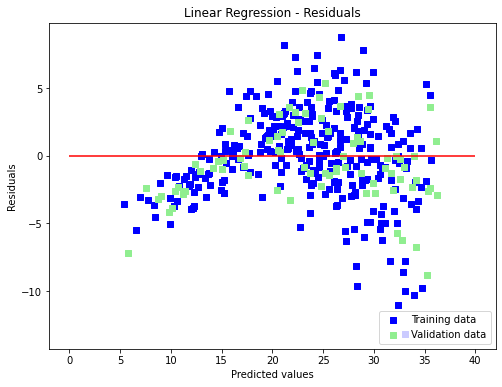

In [ ]:
# Plot residuals
plt.subplots(figsize=(8,6))
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear Regression - Residuals")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "lower right")
plt.hlines(y = 0, xmin = 0, xmax = 40, color = "red")
plt.show()

The above plot shows the residual error of training and testing dataset around the horizontal line of reference at 0. The error value varies from 10 to -10.

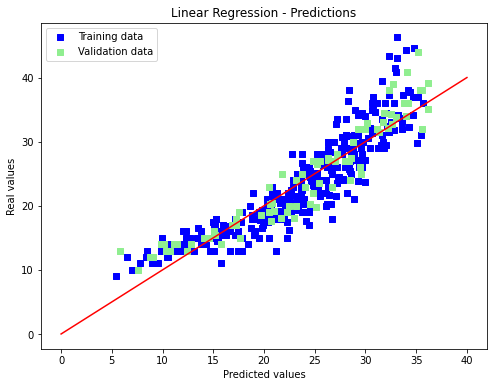

In [ ]:
# Plot predictions
plt.subplots(figsize=(8,6))
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear Regression - Predictions")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([0,40], [0, 40], c = "red")
plt.show()

The above plot shows the predicted values of mpg for training and testing dataset. 

# Part-B: Logistic Regression 

2)	Estimating horse fatalities from colic- use logistic regression to try to predict if a horse with colic will live or die

## 1. Load the dataset (Use pandas )

In [ ]:
horse_data = pd.read_csv("/content/drive/MyDrive/DS-Lab/Lab/Exp1/horse.csv")

In [ ]:
horse_data

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,533886,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,...,55.0,65.0,NaN,NaN,euthanized,no,3205,0,0,no
295,no,adult,527702,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,...,44.0,NaN,serosanguious,3.3,euthanized,yes,2208,0,0,yes
296,yes,adult,529386,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,...,60.0,6.8,NaN,NaN,died,yes,3205,0,0,no
297,yes,adult,530612,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,...,50.0,6.0,serosanguious,3.4,lived,yes,2208,0,0,yes


In [ ]:
horse_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

The info given above gives the insights about horse data read using csv. It contains 299 samples and 28 features.

In [ ]:
horse_data.describe()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,2.990000e+02,239.000000,275.000000,241.000000,53.000000,270.000000,266.000000,101.000000,299.000000,299.000000,299.000000
mean,1.087733e+06,38.168619,72.000000,30.460581,4.707547,46.307407,24.274436,3.039604,3659.709030,90.528428,7.387960
std,1.532032e+06,0.733744,28.646219,17.666102,1.982311,10.436743,27.364194,1.967947,5408.472421,650.637139,127.749768
min,5.184760e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.300000,0.100000,0.000000,0.000000,0.000000
25%,5.289040e+05,37.800000,48.000000,18.000000,3.000000,38.000000,6.500000,2.000000,2111.500000,0.000000,0.000000
50%,5.303010e+05,38.200000,64.000000,25.000000,5.000000,45.000000,7.500000,2.300000,2322.000000,0.000000,0.000000
75%,5.347360e+05,38.500000,88.000000,36.000000,6.500000,52.000000,56.750000,3.900000,3209.000000,0.000000,0.000000
max,5.305629e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,7111.000000,2209.000000


The above output gives the statistical description of the numerical features in the dataset.

## 2. Data Preprocessing (Handling NA values)

In [ ]:
# count of null values in each column
total = horse_data.isnull().sum().sort_values(ascending=False)
percent = (horse_data.isnull().sum()*100/horse_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
nasogastric_reflux_ph,246,82.274247
abdomo_protein,198,66.220736
abdomo_appearance,165,55.183946
abdomen,118,39.464883
nasogastric_reflux,106,35.451505
nasogastric_tube,104,34.782609
rectal_exam_feces,102,34.113712
peripheral_pulse,69,23.076923
rectal_temp,60,20.066890
respiratory_rate,58,19.397993


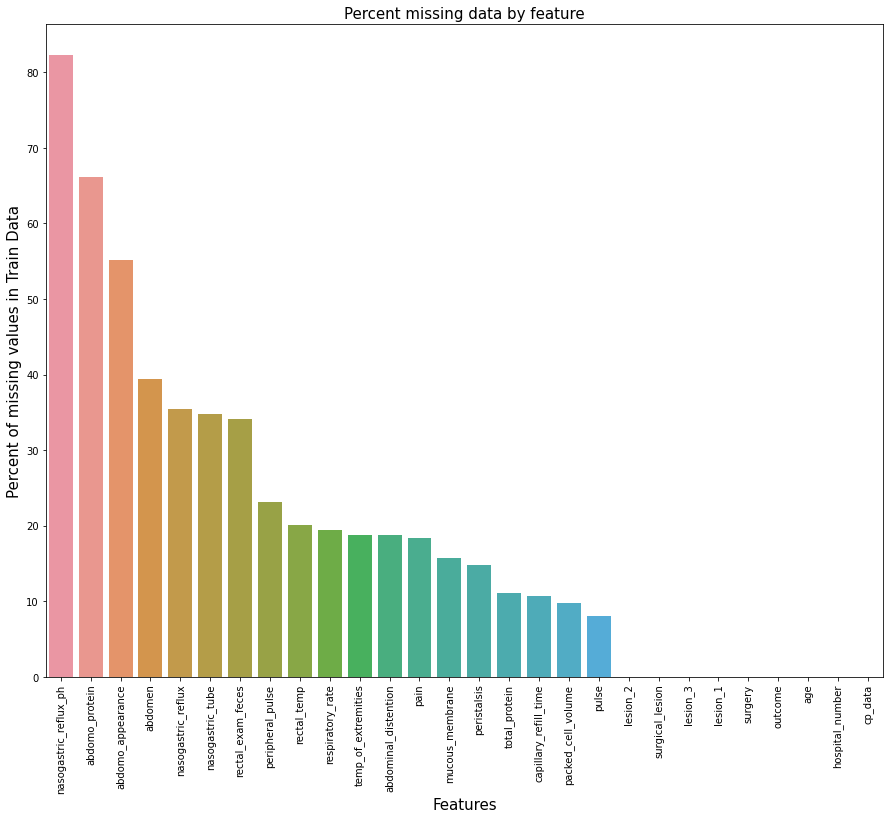

In [ ]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values in Train Data', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
plt.show()

The above plot shows the percentage of null values present in each column. We can see that nasogastric_reflux_ph column consists of the highest 82.274 % null values.

Removing columns with more than 40% of null values

In [ ]:
# Finding columns having null values more than 40%
null_columns = horse_data.columns[horse_data.isna().mean() > 0.40]
null_columns

Index(['nasogastric_reflux_ph', 'abdomo_appearance', 'abdomo_protein'], dtype='object')

In [ ]:
horse_data = horse_data.drop(columns = null_columns)
horse_data

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,decreased,distend_large,45.0,8.4,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,absent,other,50.0,85.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,normal,normal,33.0,6.7,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,decreased,NaN,48.0,7.2,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,NaN,NaN,74.0,7.4,died,no,4300,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,533886,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,...,NaN,distend_large,55.0,65.0,euthanized,no,3205,0,0,no
295,no,adult,527702,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,...,absent,distend_small,44.0,NaN,euthanized,yes,2208,0,0,yes
296,yes,adult,529386,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,...,decreased,distend_large,60.0,6.8,died,yes,3205,0,0,no
297,yes,adult,530612,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,...,absent,distend_small,50.0,6.0,lived,yes,2208,0,0,yes


### Dividing columns into categorical and numerical columns

In [ ]:
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_columns = []
categorical_columns = []
features = horse_data.columns.values.tolist()
for col in features:
    if horse_data[col].dtype in numerics:
        numerical_columns.append(col)
    else:
        categorical_columns.append(col)
print("Numerical Columns: ", numerical_columns)

print("\nCategorical Columns: ", categorical_columns)

Numerical Columns:  ['hospital_number', 'rectal_temp', 'pulse', 'respiratory_rate', 'packed_cell_volume', 'total_protein', 'lesion_1', 'lesion_2', 'lesion_3']

Categorical Columns:  ['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces', 'abdomen', 'outcome', 'surgical_lesion', 'cp_data']


### Replacing NaN values in numerical columns with their median

In [ ]:
for col in numerical_columns:
    horse_data.loc[(horse_data["outcome"] == 'died') & (horse_data[col].isnull()), col] = horse_data[horse_data["outcome"] == 'died'][col].median()
    horse_data.loc[(horse_data["outcome"] == 'euthanized') & (horse_data[col].isnull()), col] = horse_data[horse_data["outcome"] == 'euthanized'][col].median()
    horse_data.loc[(horse_data["outcome"] == 'lived') & (horse_data[col].isnull()), col] = horse_data[horse_data["outcome"] == 'lived'][col].median()

### Replacing NaN values in categorical columns with their mode

In [ ]:
for col in categorical_columns:
    horse_data.loc[(horse_data["outcome"] == 'died') & (horse_data[col].isnull()), col] = horse_data[horse_data["outcome"] == 'died'][col].mode()[0]
    horse_data.loc[(horse_data["outcome"] == 'euthanized') & (horse_data[col].isnull()), col] = horse_data[horse_data["outcome"] == 'euthanized'][col].mode()[0]
    horse_data.loc[(horse_data["outcome"] == 'lived') & (horse_data[col].isnull()), col] = horse_data[horse_data["outcome"] == 'lived'][col].mode()[0]

### Target Variable

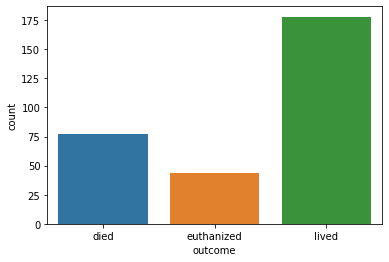

In [ ]:
sns.countplot(data=horse_data, x="outcome" )
plt.show()

We can see that majority of the data has outcome as lived followed by died and euthanized.

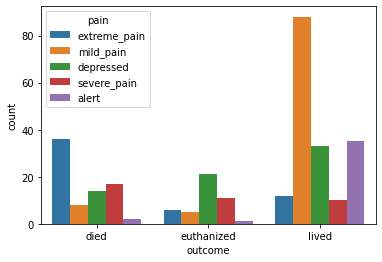

In [ ]:
# Relation between outcome and degree of pain experienced by the horse
sns.countplot(data=horse_data, x='outcome', hue = 'pain')
plt.show()

The above graph shows that the count for mild pain is larger in lived outcome which indicates the reason for survival.

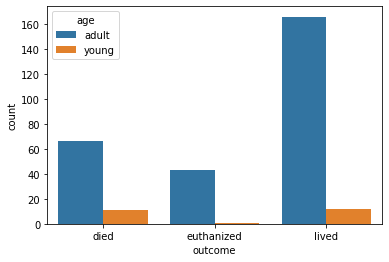

In [ ]:
# Relation between outcome and degree of age of the horse
sns.countplot(data=horse_data, x='outcome', hue = 'age')
plt.show()

The above plot shows the majority of adult horses in the dataset

### Converting Categorical Data to Numeric

In [ ]:
for col in categorical_columns:
    cat_data = horse_data[col].astype('category')
    mapping = dict(enumerate(cat_data.cat.categories))
    print(col," : ",mapping,"\n")

surgery  :  {0: 'no', 1: 'yes'} 

age  :  {0: 'adult', 1: 'young'} 

temp_of_extremities  :  {0: 'cold', 1: 'cool', 2: 'normal', 3: 'warm'} 

peripheral_pulse  :  {0: 'absent', 1: 'increased', 2: 'normal', 3: 'reduced'} 

mucous_membrane  :  {0: 'bright_pink', 1: 'bright_red', 2: 'dark_cyanotic', 3: 'normal_pink', 4: 'pale_cyanotic', 5: 'pale_pink'} 

capillary_refill_time  :  {0: '3', 1: 'less_3_sec', 2: 'more_3_sec'} 

pain  :  {0: 'alert', 1: 'depressed', 2: 'extreme_pain', 3: 'mild_pain', 4: 'severe_pain'} 

peristalsis  :  {0: 'absent', 1: 'hypermotile', 2: 'hypomotile', 3: 'normal'} 

abdominal_distention  :  {0: 'moderate', 1: 'none', 2: 'severe', 3: 'slight'} 

nasogastric_tube  :  {0: 'none', 1: 'significant', 2: 'slight'} 

nasogastric_reflux  :  {0: 'less_1_liter', 1: 'more_1_liter', 2: 'none'} 

rectal_exam_feces  :  {0: 'absent', 1: 'decreased', 2: 'increased', 3: 'normal'} 

abdomen  :  {0: 'distend_large', 1: 'distend_small', 2: 'firm', 3: 'normal', 4: 'other'} 

outcome

In [ ]:
for col in categorical_columns:
    horse_data[col] = horse_data[col].astype('category').cat.codes

In [ ]:
horse_data

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,0,0,530101.0,38.50,66.0,28.0,1,3,4,2,...,1,0,45.0,8.4,0,0,11300.0,0,0,0
1,1,0,534817.0,39.20,88.0,20.0,1,3,4,1,...,0,4,50.0,85.0,1,0,2208.0,0,0,0
2,0,0,530334.0,38.30,40.0,24.0,2,2,5,1,...,3,3,33.0,6.7,2,0,0.0,0,0,1
3,1,1,5290409.0,39.10,164.0,84.0,0,2,2,2,...,1,0,48.0,7.2,0,1,2208.0,0,0,1
4,0,0,530255.0,37.30,104.0,35.0,1,3,2,2,...,0,0,74.0,7.4,0,0,4300.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1,0,533886.0,38.05,120.0,70.0,0,3,4,2,...,0,0,55.0,65.0,1,0,3205.0,0,0,0
295,0,0,527702.0,37.20,72.0,24.0,1,1,4,2,...,0,1,44.0,56.0,1,1,2208.0,0,0,1
296,1,0,529386.0,37.50,72.0,30.0,0,3,4,1,...,1,0,60.0,6.8,0,1,3205.0,0,0,0
297,1,0,530612.0,36.50,100.0,24.0,1,3,5,1,...,0,1,50.0,6.0,2,1,2208.0,0,0,1


In [ ]:
horse_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    int8   
 1   age                    299 non-null    int8   
 2   hospital_number        299 non-null    float64
 3   rectal_temp            299 non-null    float64
 4   pulse                  299 non-null    float64
 5   respiratory_rate       299 non-null    float64
 6   temp_of_extremities    299 non-null    int8   
 7   peripheral_pulse       299 non-null    int8   
 8   mucous_membrane        299 non-null    int8   
 9   capillary_refill_time  299 non-null    int8   
 10  pain                   299 non-null    int8   
 11  peristalsis            299 non-null    int8   
 12  abdominal_distention   299 non-null    int8   
 13  nasogastric_tube       299 non-null    int8   
 14  nasogastric_reflux     299 non-null    int8   
 15  rectal

Now all features in the dataset are numerical i.e either int or float

## 3. Exploratory Data Analysis (understanding the relationships between the variables with help of plot, scatter-plot, enery-plot etc) Use matplotlib 

### Correlation Matrix

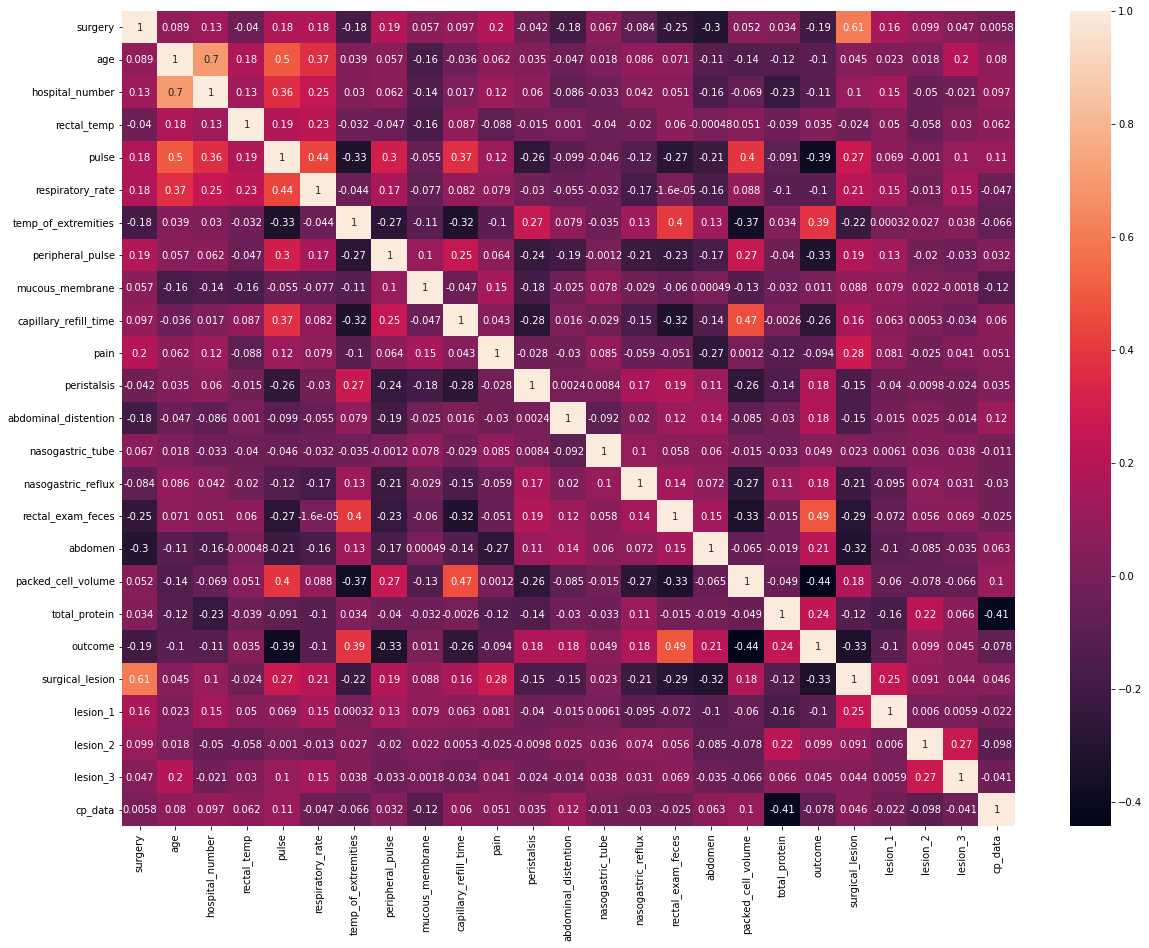

In [ ]:
correlation_data = horse_data.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(correlation_data, annot=True)
plt.show()

Arranging columns according to their correlation with outcome variable in descending order

In [ ]:
correlation_values = correlation_data['outcome'].sort_values(ascending=False)
correlation_values = abs(correlation_values).sort_values(ascending=False)
print("Correlation of Features wrt Outcome")
print(abs(correlation_values).sort_values(ascending=False))

Correlation of Features wrt Outcome
outcome                  1.000000
rectal_exam_feces        0.487818
packed_cell_volume       0.442790
temp_of_extremities      0.390457
pulse                    0.389403
surgical_lesion          0.332933
peripheral_pulse         0.326043
capillary_refill_time    0.261947
total_protein            0.244050
abdomen                  0.214875
surgery                  0.189222
abdominal_distention     0.184764
peristalsis              0.181793
nasogastric_reflux       0.181422
hospital_number          0.106396
respiratory_rate         0.103874
age                      0.101782
lesion_1                 0.100738
lesion_2                 0.098993
pain                     0.093630
cp_data                  0.078066
nasogastric_tube         0.049156
lesion_3                 0.044631
rectal_temp              0.035336
mucous_membrane          0.011042
Name: outcome, dtype: float64


We can see that rectal_exam_feces has the highest correlation of 0.487818 with the outcome variable. 

### Removing features having very less correlation with outcome

In [ ]:
for col in range(len(correlation_values)):
    if abs(correlation_values[col]) < 0.24:
        horse_data = horse_data.drop([correlation_values.index[col]], axis=1)

In [ ]:
horse_data

,pulse,temp_of_extremities,peripheral_pulse,capillary_refill_time,rectal_exam_feces,packed_cell_volume,total_protein,outcome,surgical_lesion
0,66.0,1,3,2,1,45.0,8.4,0,0
1,88.0,1,3,1,0,50.0,85.0,1,0
2,40.0,2,2,1,3,33.0,6.7,2,0
3,164.0,0,2,2,1,48.0,7.2,0,1
4,104.0,1,3,2,0,74.0,7.4,0,0
...,...,...,...,...,...,...,...,...,...
294,120.0,0,3,2,0,55.0,65.0,1,0
295,72.0,1,1,2,0,44.0,56.0,1,1
296,72.0,0,3,1,1,60.0,6.8,0,1
297,100.0,1,3,1,0,50.0,6.0,2,1


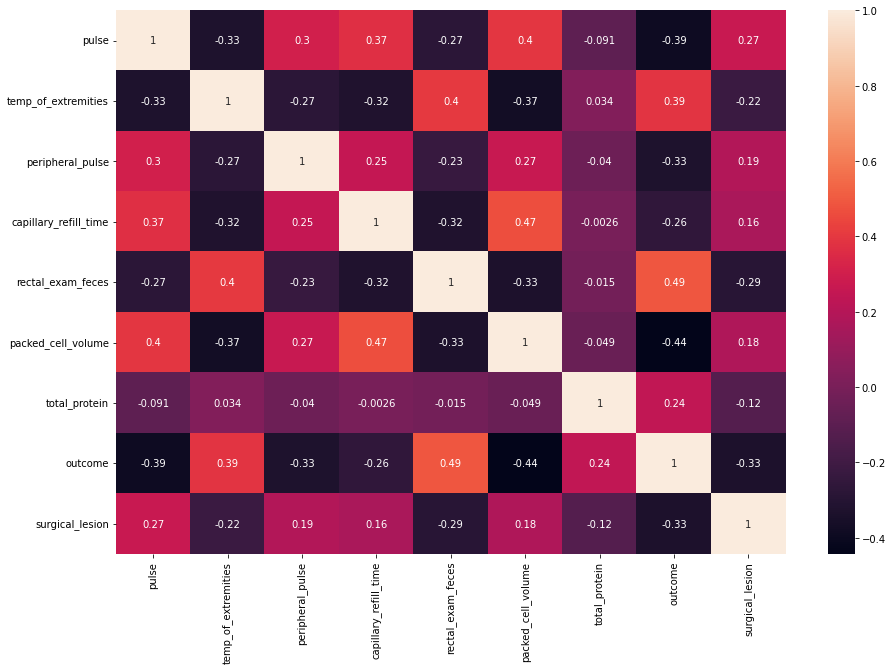

In [ ]:
plt.subplots(figsize=(15,10))
sns.heatmap(horse_data.corr(), annot=True)
plt.show()

### KDE Plots for features having maximum correlation with Outcome

### KDE Plot for packed_cell_volume

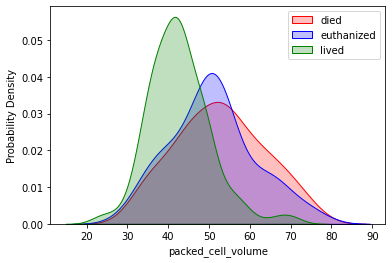

In [ ]:
# Plotting the KDE Plot
ax = sns.kdeplot(horse_data.loc[(horse_data['outcome']==0),
            'packed_cell_volume'], color='red', shade=True, Label='died')
  
sns.kdeplot(horse_data.loc[(horse_data['outcome']==1), 
            'packed_cell_volume'], color='blue', shade=True, Label='euthanized')

sns.kdeplot(horse_data.loc[(horse_data['outcome']==2), 
            'packed_cell_volume'], color='green', shade=True, Label='lived')
plt.legend()
plt.xlabel('packed_cell_volume')
plt.ylabel('Probability Density')
plt.show()

From the above plot, we can see that based on packed_cell_volume feature the lived outcome is separable from other two but died and euthanized nearly overlap each other

### KDE Plot for pulse

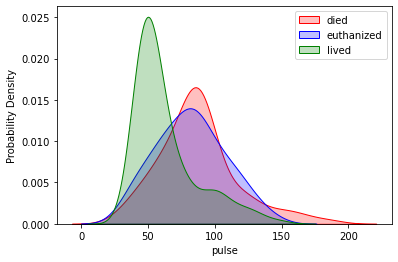

In [ ]:
# Plotting the KDE Plot
ax = sns.kdeplot(horse_data.loc[(horse_data['outcome']==0),
            'pulse'], color='red', shade=True, Label='died')
  
sns.kdeplot(horse_data.loc[(horse_data['outcome']==1), 
            'pulse'], color='blue', shade=True, Label='euthanized')

sns.kdeplot(horse_data.loc[(horse_data['outcome']==2), 
            'pulse'], color='green', shade=True, Label='lived')
plt.legend()
plt.xlabel('pulse')
plt.ylabel('Probability Density')
plt.show()

From the above plot, we can see that based on pulse feature the lived outcome is separable from other two but died and euthanized nearly overlap each other

### KDE Plot for surgical_lesion

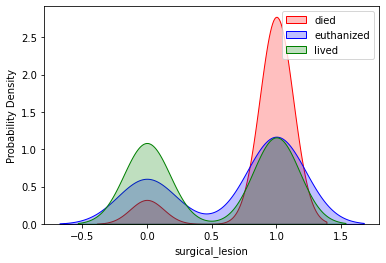

In [ ]:
# Plotting the KDE Plot
ax = sns.kdeplot(horse_data.loc[(horse_data['outcome']==0),
            'surgical_lesion'], color='red', shade=True, Label='died')
  
sns.kdeplot(horse_data.loc[(horse_data['outcome']==1), 
            'surgical_lesion'], color='blue', shade=True, Label='euthanized')

sns.kdeplot(horse_data.loc[(horse_data['outcome']==2), 
            'surgical_lesion'], color='green', shade=True, Label='lived')
plt.legend()
plt.xlabel('surgical_lesion')
plt.ylabel('Probability Density')
plt.show()

From the above plot, we can see that based on surgical_leison all outcomes nearly overlap each other.

### Histograms for all features

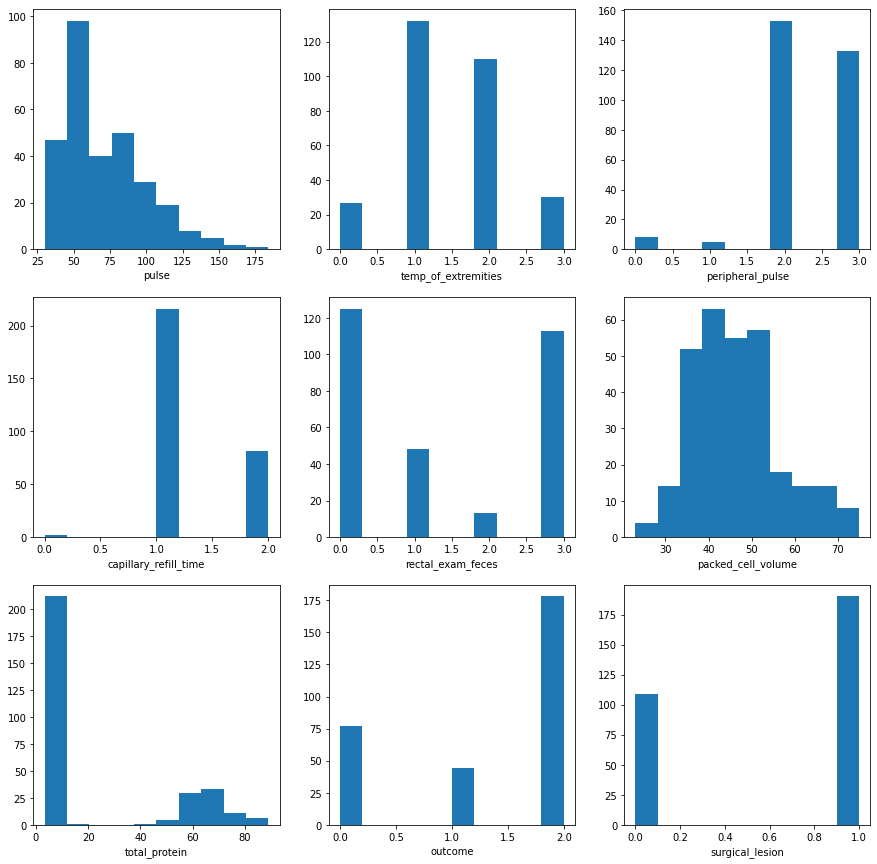

In [ ]:
plt.figure(figsize=(15,15))
col = horse_data.columns
for i in range(0,len(col)):
    plt.subplot(len(col)//3,3,i+1)
    plt.hist(horse_data[col[i]]);
    plt.xlabel(col[i])

The above plot shows the the distribution of all features present in the dataset through the histograms. We can see that pulse column is right skewed.

Number of samples per class

In [ ]:
horse_data['outcome'].value_counts()

2    178
0     77
1     44
Name: outcome, dtype: int64

There are 77 rows with died as outcome, 44 rows with euthanized as outcome and 178 rows with lived as outcome.

## 4. Data Partition (80% for training and 20% for testing) (Use scikit-learn)

In [ ]:
# Independent attributes
X = horse_data.drop(columns='outcome')

# Dependent attributes
Y = horse_data[['outcome']]

# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# Normalization using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

## 5. Build the model (use scikit learn)

In [ ]:
regression_model = LogisticRegression(multi_class='multinomial', C=10)
regression_model.fit(X_train, y_train)

LogisticRegression(C=10, multi_class='multinomial')

## 6. Summarize the model. 

In [ ]:
regression_model.get_params()

{'C': 10,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'multinomial',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

## 7. Prediction

In [ ]:
y_pred = regression_model.predict(X_test)

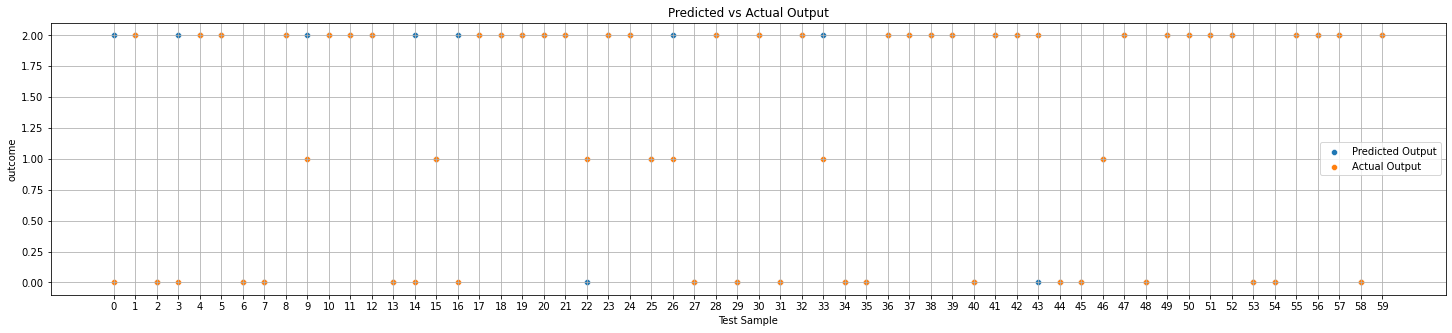

In [ ]:
plt.figure(figsize=(25,5))
sns.scatterplot(range(len(y_pred)), y_pred, label="Predicted Output")
sns.scatterplot(range(len(y_pred)), y_test['outcome'], label="Actual Output")
plt.xticks(range(len(y_pred)))
plt.xlabel("Test Sample")
plt.title("Predicted vs Actual Output")
plt.grid()
plt.show()

## 8. Evaluate the model

## Test Accuracy

In [ ]:
print(f"Test Accuracy: {round(accuracy_score(y_test, y_pred) * 100,3)} %" )

Test Accuracy: 85.0 %


## Confusion Matrix

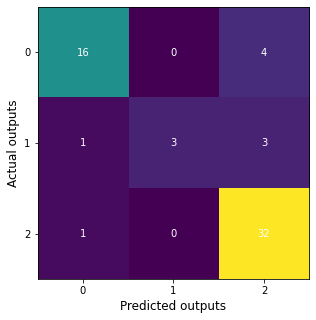

In [ ]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
ax.set_ylabel('Actual outputs', fontsize=12, color='black')
ax.xaxis.set(ticks=range(3))
ax.yaxis.set(ticks=range(3))
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

## Classification Report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        20
           1       1.00      0.43      0.60         7
           2       0.82      0.97      0.89        33

    accuracy                           0.85        60
   macro avg       0.90      0.73      0.78        60
weighted avg       0.86      0.85      0.84        60



## ROC Curve and AUC for each Class

In [ ]:
y_prob = regression_model.predict_proba(X_test)

n_classes = len(regression_model.classes_)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

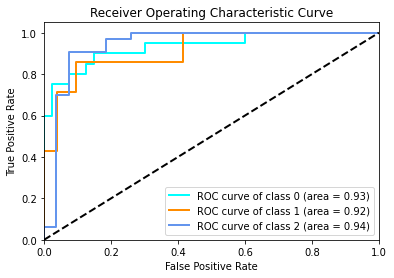

In [ ]:
# plotting 
lw = 2   
colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc="lower right")
plt.show()

The above plot shows the ROC plots for each outcome variable. The 'lived' class has the highest Area Under Curve (AUC) of 0.94 followed by class 'died' (AUC = 0.93) and class 'euthanized (AUC = 0.92)

## 9. Tuning the model

Performing the hyperparameter tuning using GridSearchCV by passing the multiple values for parameters in the grid

In [ ]:
LR = LogisticRegression(multi_class='multinomial')
LRparam_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'max_iter': list(range(100,800,100)),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}


In [ ]:
LR_search = GridSearchCV(LR, param_grid=LRparam_grid, verbose = 3, cv=5)

# fitting the model for grid search 
LR_search.fit(X , Y)

Fitting 5 folds for each of 735 candidates, totalling 3675 fits
[CV 1/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0

GridSearchCV(cv=5, estimator=LogisticRegression(multi_class='multinomial'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [100, 200, 300, 400, 500, 600, 700],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=3)

In [ ]:
# summarize
print('Mean Accuracy: %.3f' % LR_search.best_score_)
print('Best Parameters: %s' % LR_search.best_params_)

Mean Accuracy: 0.806
Best Parameters: {'C': 1, 'max_iter': 200, 'penalty': 'l2', 'solver': 'sag'}


Creating the model with the best parameters obtained in the hyperparameter tuning

In [ ]:
LR_tuned = LogisticRegression(**LR_search.best_params_, multi_class='multinomial')

In [ ]:
LR_tuned.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=200, multi_class='multinomial', solver='sag')

## Prediction

In [ ]:
y_pred = LR_tuned.predict(X_test)

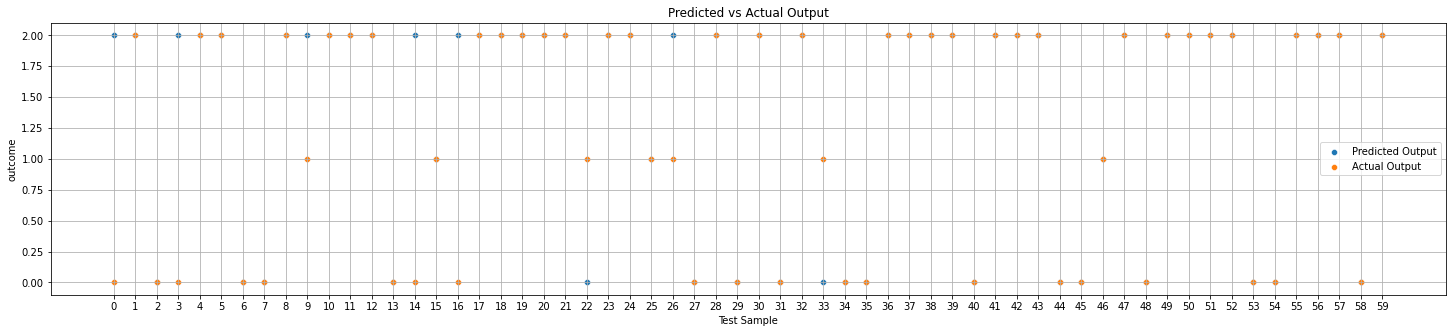

In [ ]:
plt.figure(figsize=(25,5))
sns.scatterplot(range(len(y_pred)), y_pred, label="Predicted Output")
sns.scatterplot(range(len(y_pred)), y_test['outcome'], label="Actual Output")
plt.xticks(range(len(y_pred)))
plt.xlabel("Test Sample")
plt.title("Predicted vs Actual Output")
plt.grid()
plt.show()

## Test Accuracy

In [ ]:
print(f"Test Accuracy: {round(accuracy_score(y_test, y_pred) * 100,3)} %" )

Test Accuracy: 86.667 %


## Confusion Matrix

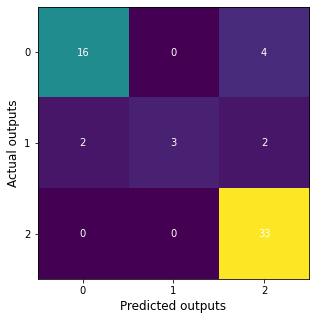

In [ ]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
ax.set_ylabel('Actual outputs', fontsize=12, color='black')
ax.xaxis.set(ticks=range(3))
ax.yaxis.set(ticks=range(3))
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

## Classification Report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        20
           1       1.00      0.43      0.60         7
           2       0.85      1.00      0.92        33

    accuracy                           0.87        60
   macro avg       0.91      0.74      0.79        60
weighted avg       0.88      0.87      0.85        60



## ROC Curve and AUC for each Class

In [ ]:
y_prob = LR_tuned.predict_proba(X_test)

n_classes = len(LR_tuned.classes_)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

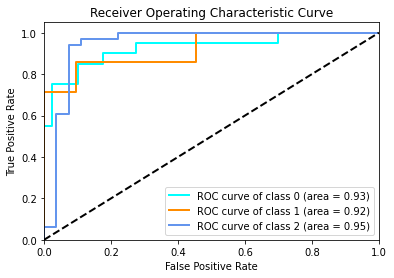

In [ ]:
# plotting 
lw = 2   
colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc="lower right")
plt.show()

The above plot shows the ROC plots for each outcome variable. The 'lived' class has the highest Area Under Curve (AUC) of 0.95 followed by class 'died' (AUC = 0.93) and class 'euthanized (AUC = 0.92)

# Part-C: Logistic Regression

3)	Credit Score prediction – a Model to predict the probabilities of default. Use Linear Regression to predict the probabilities of default and assign credit to potential borrowers 

## 1. Load the dataset (Use pandas)


In [ ]:
credit_columns = ['status_checking_acc', 'duration', 'credit_history', 'purpose', 'credit_amount', 'savings_account_bonds', 
                  'present_employment', 'installment_rate', 'personal_status', 'guarantors', 'present_residence', 'property',
                  'age', 'other_installment', 'housing', 'no_of_credits', 'job', 'no_of_people_liable',
                  'telephone', 'foreign_worker', 'risk']


In [ ]:
credit_data = pd.read_csv('/content/drive/MyDrive/DS-Lab/Lab/Exp1/german.data', sep=" ", names=credit_columns, header=None)

In [ ]:
credit_data.head()

,status_checking_acc,duration,credit_history,purpose,credit_amount,savings_account_bonds,present_employment,installment_rate,personal_status,guarantors,...,property,age,other_installment,housing,no_of_credits,job,no_of_people_liable,telephone,foreign_worker,risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [ ]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   status_checking_acc    1000 non-null   object
 1   duration               1000 non-null   int64 
 2   credit_history         1000 non-null   object
 3   purpose                1000 non-null   object
 4   credit_amount          1000 non-null   int64 
 5   savings_account_bonds  1000 non-null   object
 6   present_employment     1000 non-null   object
 7   installment_rate       1000 non-null   int64 
 8   personal_status        1000 non-null   object
 9   guarantors             1000 non-null   object
 10  present_residence      1000 non-null   int64 
 11  property               1000 non-null   object
 12  age                    1000 non-null   int64 
 13  other_installment      1000 non-null   object
 14  housing                1000 non-null   object
 15  no_of_credits         

The above output shows the basic info about the dataset. The dataset consists of both categorical and numerical features. There are total 21 features and 1000 data samples.

## 2. Data Preprocessing (Handling NA values)

In [ ]:
# count of null values in each column
print(credit_data.isnull().sum())

status_checking_acc      0
duration                 0
credit_history           0
purpose                  0
credit_amount            0
savings_account_bonds    0
present_employment       0
installment_rate         0
personal_status          0
guarantors               0
present_residence        0
property                 0
age                      0
other_installment        0
housing                  0
no_of_credits            0
job                      0
no_of_people_liable      0
telephone                0
foreign_worker           0
risk                     0
dtype: int64


The above output shows that there are no null values present in the dataset.

In [ ]:
credit_data['risk'] = credit_data['risk'].map({1: 0, 2: 1})

Now risk value of 0 referes to Good and 1 refers to Bad

In [ ]:
credit_data

,status_checking_acc,duration,credit_history,purpose,credit_amount,savings_account_bonds,present_employment,installment_rate,personal_status,guarantors,...,property,age,other_installment,housing,no_of_credits,job,no_of_people_liable,telephone,foreign_worker,risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,0
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,0
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,0
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,0
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,1


### Dividing columns into categorical and numerical columns

In [ ]:
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_columns = []
categorical_columns = []
features = credit_data.columns.values.tolist()
for col in features:
    if credit_data[col].dtype in numerics:
        numerical_columns.append(col)
    else:
        categorical_columns.append(col)
print("Numerical Columns: ", numerical_columns)

print("\nCategorical Columns: ", categorical_columns)

Numerical Columns:  ['duration', 'credit_amount', 'installment_rate', 'present_residence', 'age', 'no_of_credits', 'no_of_people_liable', 'risk']

Categorical Columns:  ['status_checking_acc', 'credit_history', 'purpose', 'savings_account_bonds', 'present_employment', 'personal_status', 'guarantors', 'property', 'other_installment', 'housing', 'job', 'telephone', 'foreign_worker']


### Converting Categorical data to Numeric

In [ ]:
for col in categorical_columns:
    cat_data = credit_data[col].astype('category')
    mapping = dict(enumerate(cat_data.cat.categories))
    print(col," : ",mapping,"\n")

status_checking_acc  :  {0: 'A11', 1: 'A12', 2: 'A13', 3: 'A14'} 

credit_history  :  {0: 'A30', 1: 'A31', 2: 'A32', 3: 'A33', 4: 'A34'} 

purpose  :  {0: 'A40', 1: 'A41', 2: 'A410', 3: 'A42', 4: 'A43', 5: 'A44', 6: 'A45', 7: 'A46', 8: 'A48', 9: 'A49'} 

savings_account_bonds  :  {0: 'A61', 1: 'A62', 2: 'A63', 3: 'A64', 4: 'A65'} 

present_employment  :  {0: 'A71', 1: 'A72', 2: 'A73', 3: 'A74', 4: 'A75'} 

personal_status  :  {0: 'A91', 1: 'A92', 2: 'A93', 3: 'A94'} 

guarantors  :  {0: 'A101', 1: 'A102', 2: 'A103'} 

property  :  {0: 'A121', 1: 'A122', 2: 'A123', 3: 'A124'} 

other_installment  :  {0: 'A141', 1: 'A142', 2: 'A143'} 

housing  :  {0: 'A151', 1: 'A152', 2: 'A153'} 

job  :  {0: 'A171', 1: 'A172', 2: 'A173', 3: 'A174'} 

telephone  :  {0: 'A191', 1: 'A192'} 

foreign_worker  :  {0: 'A201', 1: 'A202'} 



The description of the columns can be found at - https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)


In [ ]:
for col in categorical_columns:
    credit_data[col] = credit_data[col].astype('category').cat.codes

In [ ]:
credit_data

,status_checking_acc,duration,credit_history,purpose,credit_amount,savings_account_bonds,present_employment,installment_rate,personal_status,guarantors,...,property,age,other_installment,housing,no_of_credits,job,no_of_people_liable,telephone,foreign_worker,risk
0,0,6,4,4,1169,4,4,4,2,0,...,0,67,2,1,2,2,1,1,0,0
1,1,48,2,4,5951,0,2,2,1,0,...,0,22,2,1,1,2,1,0,0,1
2,3,12,4,7,2096,0,3,2,2,0,...,0,49,2,1,1,1,2,0,0,0
3,0,42,2,3,7882,0,3,2,2,2,...,1,45,2,2,1,2,2,0,0,0
4,0,24,3,0,4870,0,2,3,2,0,...,3,53,2,2,2,2,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12,2,3,1736,0,3,3,1,0,...,0,31,2,1,1,1,1,0,0,0
996,0,30,2,1,3857,0,2,4,0,0,...,1,40,2,1,1,3,1,1,0,0
997,3,12,2,4,804,0,4,4,2,0,...,2,38,2,1,1,2,1,0,0,0
998,0,45,2,4,1845,0,2,4,2,0,...,3,23,2,2,1,2,1,1,0,1


In [ ]:
credit_data.describe()

,status_checking_acc,duration,credit_history,purpose,credit_amount,savings_account_bonds,present_employment,installment_rate,personal_status,guarantors,...,property,age,other_installment,housing,no_of_credits,job,no_of_people_liable,telephone,foreign_worker,risk
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.577000,20.903000,2.54500,3.277000,3271.258000,1.105000,2.384000,2.973000,1.68200,0.145000,...,1.358000,35.546000,1.675000,0.929000,1.407000,1.904000,1.155000,0.404000,0.037000,0.300000
std,1.257638,12.058814,1.08312,2.739302,2822.736876,1.580023,1.208306,1.118715,0.70808,0.477706,...,1.050209,11.375469,0.705601,0.531264,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,0.000000,4.000000,0.00000,0.000000,250.000000,0.000000,0.000000,1.000000,0.00000,0.000000,...,0.000000,19.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,12.000000,2.00000,1.000000,1365.500000,0.000000,2.000000,2.000000,1.00000,0.000000,...,0.000000,27.000000,2.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,18.000000,2.00000,3.000000,2319.500000,0.000000,2.000000,3.000000,2.00000,0.000000,...,1.000000,33.000000,2.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,3.000000,24.000000,4.00000,4.000000,3972.250000,2.000000,4.000000,4.000000,2.00000,0.000000,...,2.000000,42.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000
max,3.000000,72.000000,4.00000,9.000000,18424.000000,4.000000,4.000000,4.000000,3.00000,2.000000,...,3.000000,75.000000,2.000000,2.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000


## 3. Exploratory Data Analysis (understanding the relationships between the variables with help of plot, scatter-plot, energy-plot etc) Use matplotlib 

### Correlation Matrix

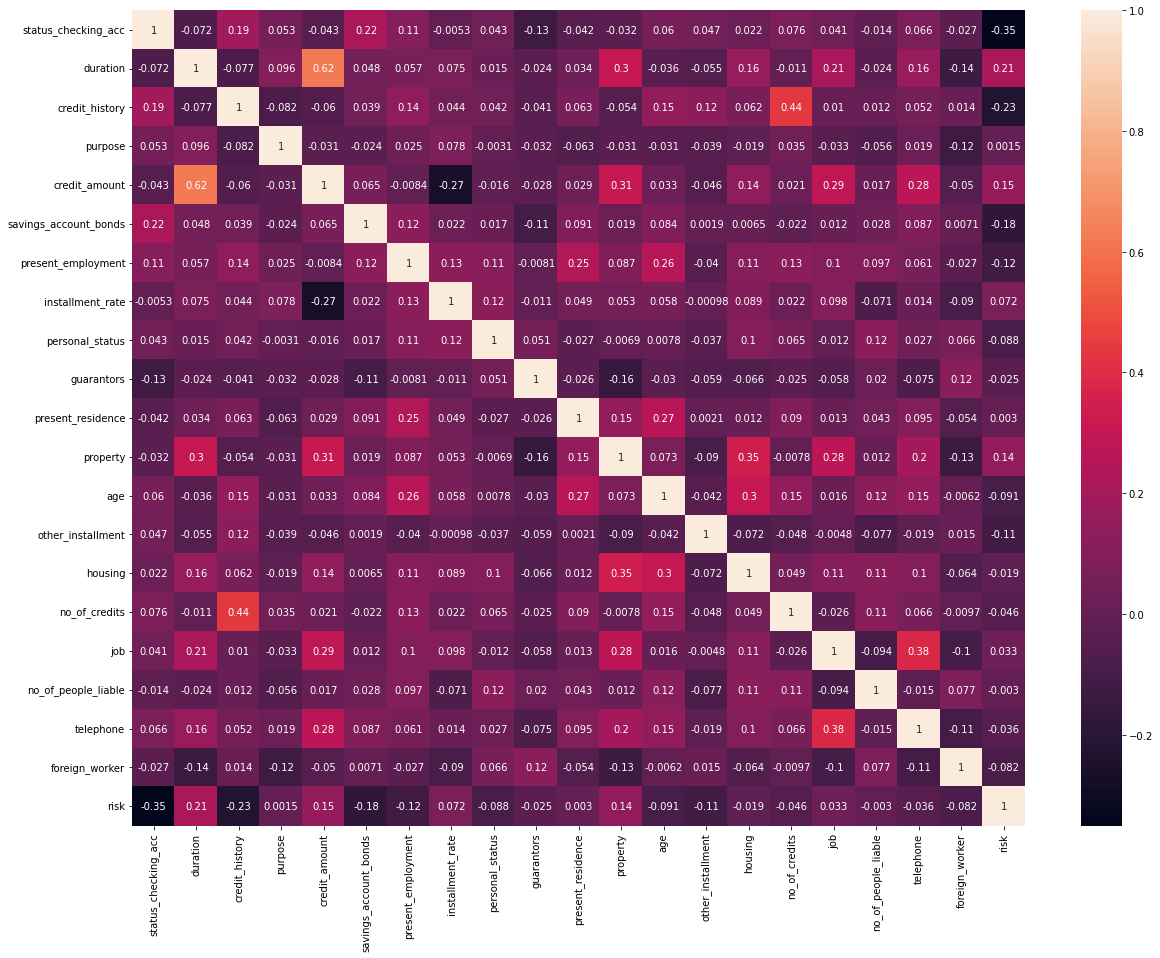

In [ ]:
correlation_data = credit_data.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(correlation_data, annot=True)
plt.show()

Arranging columns according to their correlation with outcome variable in descending order

In [ ]:
correlation_values = correlation_data['risk'].sort_values(ascending=False)
correlation_values = abs(correlation_values).sort_values(ascending=False)
print("Correlation of Features wrt Risk")
print(abs(correlation_values).sort_values(ascending=False))

Correlation of Features wrt Risk
risk                     1.000000
status_checking_acc      0.350847
credit_history           0.228785
duration                 0.214927
savings_account_bonds    0.178943
credit_amount            0.154739
property                 0.142612
present_employment       0.116002
other_installment        0.109844
age                      0.091127
personal_status          0.088184
foreign_worker           0.082079
installment_rate         0.072404
no_of_credits            0.045732
telephone                0.036466
job                      0.032735
guarantors               0.025137
housing                  0.019315
no_of_people_liable      0.003015
present_residence        0.002967
purpose                  0.001514
Name: risk, dtype: float64


We can see that status_checking_acc column has the highest correlation of 0.350847 with the target variable risk.

### Target Variable

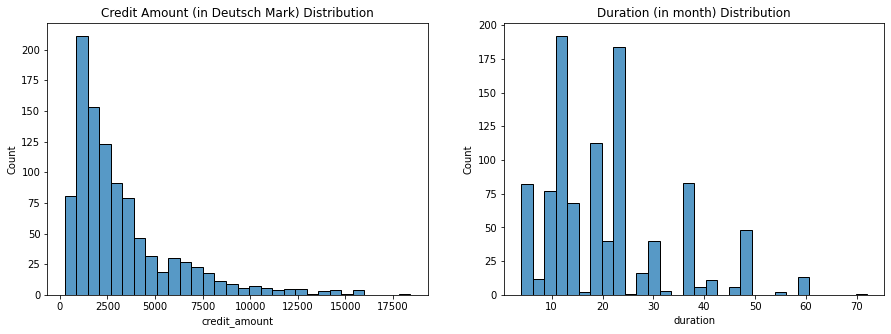

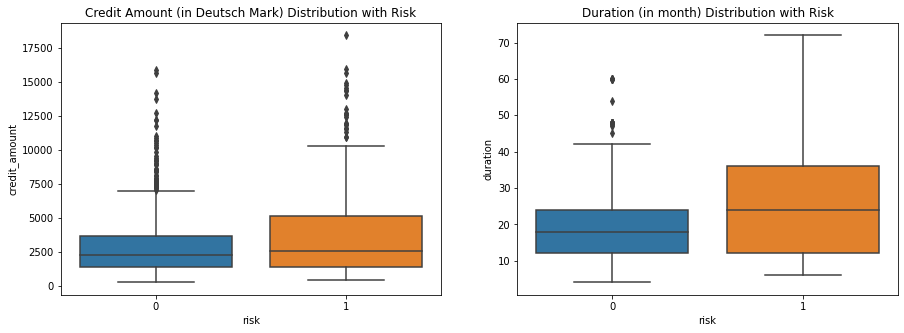

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.histplot(credit_data, x='credit_amount', bins=30, ax=ax[0]).set_title("Credit Amount (in Deutsch Mark) Distribution");
sns.histplot(credit_data, x='duration', bins=30, ax=ax[1]).set_title("Duration (in month) Distribution");

fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(data=credit_data, x='risk', y='credit_amount', ax=ax[0]).set_title("Credit Amount (in Deutsch Mark) Distribution with Risk");
sns.boxplot(data=credit_data, x='risk', y='duration', ax=ax[1]).set_title("Duration (in month) Distribution with Risk");

The higher credit amount and longer duration means higher risk to the bank.

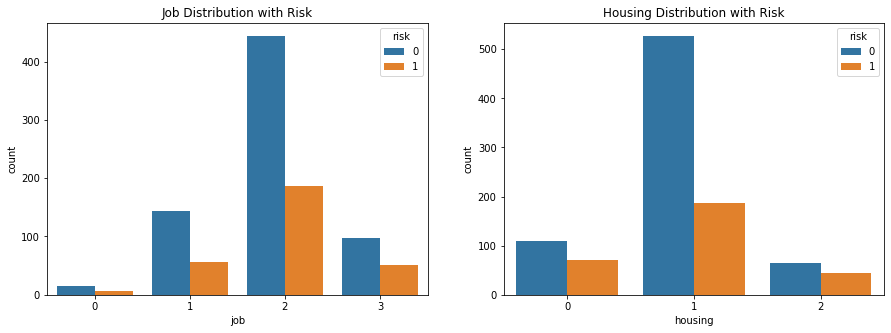

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(data=credit_data, x="job", hue="risk", ax=ax[0]).set_title("Job Distribution with Risk");
sns.countplot(data=credit_data, x="housing", hue="risk", ax=ax[1]).set_title("Housing Distribution with Risk");

0 - Good Risk,  1- Bad Risk

Most of people in records have job skill level 2, but the job skill level does not affect the risk rating much.

People who own a house means low risk and good rating to the bank.

Number of samples per class

In [ ]:
credit_data['risk'].value_counts()

0    700
1    300
Name: risk, dtype: int64

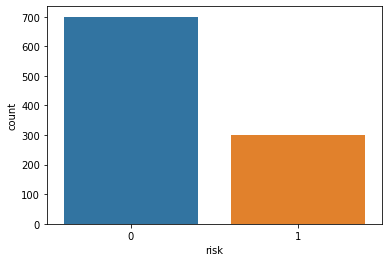

In [ ]:
sns.countplot(data=credit_data, x="risk" )
plt.show()

0 - Good Risk,  1- Bad Risk

## 4. Data Partition (80% for training and 20% for testing) (Use scikit-learn)

In [ ]:
# Independent attributes
X = credit_data.drop(columns='risk')

# X = np.array(X)

# Dependent attributes
Y = credit_data[['risk']]

# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=77)

# Normalization using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

## 5. Build the model (use scikit learn)

In [ ]:
regression_model_credit = LogisticRegression(C=0.1)
regression_model_credit.fit(X_train, y_train)

LogisticRegression(C=0.1)

## 6. Summarize the model. 

In [ ]:
regression_model_credit.get_params()

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

## 7. Prediction

In [ ]:
y_pred = regression_model_credit.predict(X_test)

## 8. Evaluate the model

## Test Accuracy

In [ ]:
print(f"Test Accuracy: {round(accuracy_score(y_test, y_pred) * 100,3)} %" )

Test Accuracy: 83.5 %


## Confusion Matrix

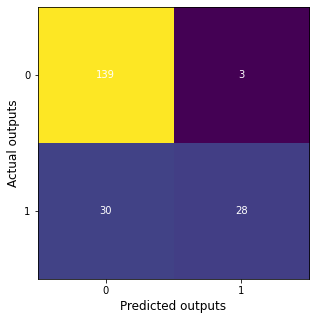

In [ ]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
ax.set_ylabel('Actual outputs', fontsize=12, color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

## Classification Report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89       142
           1       0.90      0.48      0.63        58

    accuracy                           0.83       200
   macro avg       0.86      0.73      0.76       200
weighted avg       0.85      0.83      0.82       200



## ROC Curve and AUC for each Class

In [ ]:
y_prob = regression_model_credit.predict_proba(X_test)

y_prob = y_prob[:, 1]

n_classes = len(regression_model_credit.classes_)

fpr, tpr,_ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

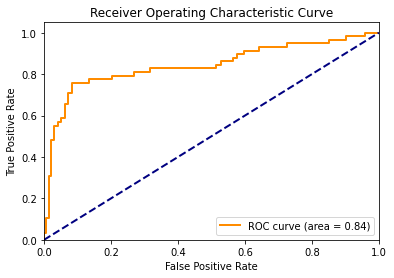

In [ ]:
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc="lower right")
plt.show()

The above plot shows the ROC plot for the target variable. The area under curve in this case is 0.84.

## 9. Tuning the model

Hyperparameter tuning is performed in order to gain the best parameters of the model.

In [ ]:
LR_credit = LogisticRegression()
LRparam_grid = {
    'C': [0.001, 0.01, 1, 10],
    'penalty': ['l1', 'l2'],
    'max_iter': list(range(100,500,100)),
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
}

In [ ]:
LR_search_credit = GridSearchCV(LR_credit, param_grid=LRparam_grid, verbose = 3, cv=5)

# fitting the model for grid search 
LR_search_credit.fit(X , Y)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV 1/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 1, 10],
                         'max_iter': [100, 200, 300, 400],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']},
             verbose=3)

In [ ]:
# summarize
print('Mean Accuracy:; %.3f' % LR_search_credit.best_score_)
print('Best Parameters: %s' % LR_search_credit.best_params_)

Mean Accuracy:; 0.760
Best Parameters: {'C': 1, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}


Creating model with the best parameters obtained in hyperparameter tuning

In [ ]:
LR_tuned_credit = LogisticRegression(**LR_search_credit.best_params_)

In [ ]:
LR_tuned_credit.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=200)

## Prediction

In [ ]:
y_pred = LR_tuned_credit.predict(X_test)

## Test Accuracy

In [ ]:
print(f"Test Accuracy: {round(accuracy_score(y_test, y_pred) * 100,3)} %" )

Test Accuracy: 85.0 %


## Confusion Matrix

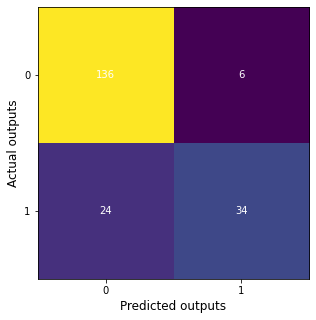

In [ ]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
ax.set_ylabel('Actual outputs', fontsize=12, color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

## Classification Report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       142
           1       0.85      0.59      0.69        58

    accuracy                           0.85       200
   macro avg       0.85      0.77      0.80       200
weighted avg       0.85      0.85      0.84       200



## ROC Curve and AUC for each Class

In [ ]:
y_prob = LR_tuned_credit.predict_proba(X_test)

y_prob = y_prob[:, 1]

n_classes = len(LR_tuned_credit.classes_)

fpr, tpr,_ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

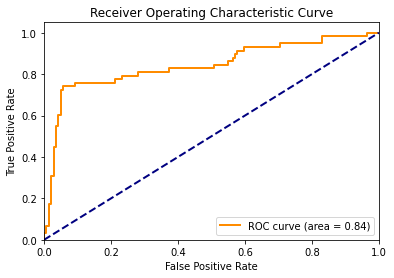

In [ ]:
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc="lower right")
plt.show()

The above plot shows the ROC plot of the model. The area under curve is 0.84 after tuning the model.

# Inference

1. Auto MPG data consists of null values in horsepower column which filled by median give better peroformance for regression model. The regression score for this model came out to be 0.88382.
2. The coefficient of regression model suggest that weight and origin of the vehicle plays an important role in predicting the MPG value.
3. The horse colic dataset consists of large number of null values in the dataset and hence needs proper data cleaning. The imputation of null values in numerical and categorical column with the median and mode wrt outcome variable respectively improved the model performance.
4. The basline regression model gave the accuracy of 85% and then hyperparamerters tuning was performed to find the best parameters for the model. The accuracy of tuned model increased to 86.7%
5. In this dataset 'euthanized' class had very few samples compared to other 2 classes and hence f1-score for this class is less compared to others due to uneven class distribution.
6. The German Credit dataset did not have any null values. The baseline regression model gave the accuracy of 83.5% and the tuned regression model increased the accuracy to 85%.
7. In this dataset also the distribution of classes in dataset is even that results in lesser f1-score of the class 1 (Bad Risk) than class 0 (Good Risk).


